In [2]:
import numpy as np
np.set_printoptions(precision=3)
np.random.seed(20221110)
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()

# Bayes' theorem

The theorem is extremelu helpful in answering questions of conditional probability:

        1. I tested positive for COVID. The test is super accurate, like 99%. 
           It is extremely likely that I have COVID, right?  
           
        2. Should the public health services test rutinely the entire population for a rare disease? 
           The tests are extremely accurate, 99%. Should we treat the patients after one positive test? 
           Should we double check?
           
        3. A geologist studies a potential oil well. He believes that there is a chance of 65% that the 
           location contains oil. 
           The oil company obtains core samples, and the samples test positive for oil. The test is accurate 85% 
           of the time, when there really is oil to be found, but 6% of the time will test positive for oil, 
           even if there is no oil. 
           What are the chances that the well contains oil?
        


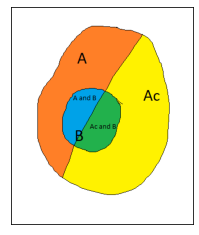

In [5]:
import matplotlib.image as mpimg
fig=plt.imshow(mpimg.imread('bayes.png'))
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

So $A$ is being sick, $Ac$ not being sick.

$B$ is tested positive. The blue part are true positives, the green part are false positives. 
(Yellow are true negatives, and orange are false positives).

We want to find the ratio of true positives to being sick. In other words, what is the probability to be in the blue region, if found in the blue or green region. 

First note that $P(B)=P(A\ and\ B)+P(Ac\ and\ B)$. 

Recall the formula for conditional probability $P(A\ and\ B)=P(B|A)P(A)$. So we have:

$P(B)=P(B|A)P(A)+P(B|Ac)P(Ac)$

What we want to find is, if thested positive, i.e. if $B$, what is the probability of being sick, i.e. $P(A|B)$.

From the formula for conditional probability:

$P(A\ and\ B)=P(B|A)P(A)$

and

$P(A\ and\ B)=P(A|B)P(B)$

Put them together:

$P(A|B)P(B)=P(B|A)P(A)$

So we have:

$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$

The infamous $\bf{Bayes' theorem}$. Here $P(A)$ is the $\bf{prior}$ probability that the tested patient is sick. This is the probability (or belief if you will) that the patient is sick before we did any testing. Now we have evidence $B$, with the $\bf{marginal}$ probability $P(B)$ of a positive test, and the $\bf{likelyhood}$ that the test is accurate $P(B|A)$. 

$P(A|B)$ is the $\bf{posterior}$ probability the the patient is sick. We have to correct our belief after we obtained some evidence. Not 100% conclusive evidence (there is no such thing), only some evidence. 

We can also write (better for calculations):

$P(A|B)=\frac{P(B|A)P(A)}{P(B|A)P(A)+P(B|Ac)P(Ac)}$



In [14]:
#Examples
#Let's do the COVID test first.
Test_PosIfSick=0.95 #This is the likelyhood P(B|A) of a true positive
Test_NegIfNot=0.95  #This is the likelyhood of a true negative
Sick=0.01           #This is the prior P(A)
NonSick=1-Sick      #This is P(Ac)=1-P(A)

SickIfPos=(Test_PosIfSick*Sick)/(Test_PosIfSick*Sick+(1-Test_NegIfNot)*NonSick)
print("The posterior, i.e. the probability to be sick if tested positive is ",round(SickIfPos,3))
print("The prior, i.e. the probability to be sick, before tested is ",Sick)

The posterior, i.e. the probability to be sick if tested positive is  0.161
The prior, i.e. the probability to be sick, before tested is  0.01


In [16]:
#Examples
#Let's do the COVID test first.
Test_PosIfSick=0.99 #This is the likelyhood P(B|A) of a true positive
Test_NegIfNot=0.99  #This is the likelyhood of a true negative
Sick=0.01            #This is the prior P(A)
NonSick=1-Sick      #This is P(Ac)=1-P(A)

SickIfPos=(Test_PosIfSick*Sick)/(Test_PosIfSick*Sick+(1-Test_NegIfNot)*NonSick)
print("The posterior, i.e. the probability to be sick if tested positive is ",round(SickIfPos,3))
#print("The prior, i.e. the probability to be sick, before tested is ",Sick)

The posterior, i.e. the probability to be sick if tested positive is  0.5


With an extremely accurate test, the result is pretty much a coin toss. Why?

In [33]:
#Let's change the prior
Test_PosIfSick=0.99 #This is the likelyhood P(B|A) of a true positive
Test_NegIfNot=0.99  #This is the likelyhood of a true negative
Sick=0.01          #This is the prior P(A)
NonSick=1-Sick     #This is P(Ac)=1-P(A)

SickIfPos=(Test_PosIfSick*Sick)/(Test_PosIfSick*Sick+(1-Test_NegIfNot)*NonSick)
print("The posterior, i.e. the probability to be sick if tested positive is ",round(SickIfPos,3))
print("The prior, i.e. the probability to be sick, before tested is ",Sick)

The posterior, i.e. the probability to be sick if tested positive is  1.0
The prior, i.e. the probability to be sick, before tested is  0.01


Here's the dilema, would you test routinely for an extremely rare disease?

Would you start treatment after one (very accurate) test? Or ask for another one. Do you understand the role of second oppinion?

We started with a prior of 1%. Did a test, modified the belief to 50%. Coin toss. 

Now 50% is our prior. Did another test, if positive, the posterior now is 99%. Better start a treatment.

Even with the best experimental equipment possible, when measuring for a rare phenomena, repeat the experiment (many times). 

# Combinatorics

Let's play with calculating some probabilities from scratch.

## Permutations

If we have several (say N) distinct elements, the permutations are all possible 
orderings of all of the N elements.

Example: 

ABC can be permuted:

ABC
ACB
BAC
BCA
CAB
CBA

If we take them in randomized order, what is the probability to get one of the pemutations?
They are all equaly probable, so:

$P(BAC)=\frac{1}{n_{p(N)}}$

where $n_{p(N)}$ is the number of all permutations of $N$ elements, $p(N)$. 

We formed all of the 3 elements permutations above by setting the first element fixed, 
then permuting the rest $N-1$ elements. 

$n_{p(N)}=N*n_{p(N-1)}$

Do you remember this recursive formula?

$n_{p(N)}=N!$ 

Factorial.

So $P(BAC)=\frac{1}{3!}=\frac{1}{3*2*1}=\frac{1}{6}$

## Partial permutations, variations

From $N$ elements, take $K$ at random.

Example: ABCD

Take only two:

AB
AC
AD
BA
BC
BD
CA
CB
CD
DA
DB
DC

So we have the number of permutations, but divided by the number of permutations of the missing elements.

$nPk=\frac{n!}{(n-k)!}$

## Combinations

What if the order of the elements is not important?

AB=BA, AC=CA etc.

AB
AC 
AD
BC
BD
CD

So, we need to reduce the number of $k$ taken out of $n$ elements, by the number of permutations of $k$ elements.

$C_{n,k}=\frac{n!}{(n-k)!k!}$

This is the binomial formula. 

Recall:

$(a+b)^n=\Sigma_{k=0}^{n}\binom{n}{k}a^kb^{n-k}$
